# 有機材料の構造最適化と可視化を行う

## ライブラリをインポート

In [1]:
import gc
import glob
import os

import pandas as pd
from tqdm.notebook import tqdm

tqdm.pandas()

import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import py3Dmol
from rdkit import Chem, rdBase
from rdkit.Chem import AllChem, Descriptors, PandasTools
from rdkit.Chem.Draw import IPythonConsole

## データを読み込み、データフレームに格納

In [2]:
df = pd.read_csv("../input/PubChem_compound_smarts_O=C(O).csv")
df

,cid,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,xlogp,heavycnt,hbonddonor,...,gpfamilycnt,neighbortype,meshheadings,annothits,annothitcnt,aids,cidcdate,sidsrcname,depcatg,annotation
0,4109,Methomyl,16752-77-5|Lannate|Mesomile|Methomyl|Methyl N-...,162.21,C5H10N2O2S,76.0,147.0,0.6,10,1,...,498,2D+3D,Methomyl,Agrochemical Information|Biological Test Resul...,16,425000|977599|977602|1081777|1081778|1081779|1...,20050325,3B Scientific (Wuhan) Corp|ABI Chem|Acadechem|...,Chemical Vendors|Curation Efforts|Governmental...,D004791 - Enzyme Inhibitors|D010575 - Pesticid...
1,6249,Ampicillin,69-53-4|Ampicillin|Aminobenzylpenicillin|Ampic...,349.40,C16H19N3O4S,138.0,562.0,-1.1,24,3,...,69138,2D+3D,Ampicillin,Biological Test Results|Chemical and Physical ...,16,357|361|364|368|371|373|374|375|411|422|425|42...,20050624,001Chemical|3B Scientific (Wuhan) Corp|3WAY PH...,Chemical Vendors|Curation Efforts|Governmental...,C254 - Anti-Infective Agent > C258 - Antibioti...
2,6277,Cobalt(II) acetate,Cobalt acetate|Cobalt(II) acetate|71-48-7|Coba...,177.02,C4H6CoO4,80.3,25.5,NaN,9,0,...,20991,2D,NaN,Biological Test Results|Chemical and Physical ...,14,651631|651632|651633|651634|720516|720552|7206...,20050719,3B Scientific (Wuhan) Corp|3WAY PHARM INC|ABI ...,Chemical Vendors|Curation Efforts|Governmental...,NaN
3,10112,Calcium Carbonate,Aragonite|CALCIUM CARBONATE|471-34-1|Limestone...,100.09,CCaO3,63.2,18.8,NaN,5,0,...,119575,2D,Calcium Carbonate,Agrochemical Information|Biological Test Resul...,16,1259407|1259409,20040916,001Chemical|3B Scientific (Wuhan) Corp|3WAY PH...,Chemical Vendors|Curation Efforts|Governmental...,A - Alimentary tract and metabolism > A02 - Dr...
4,36314,Paclitaxel,33069-62-4|P88XT4IS4D|Paclitaxel|Taxol|Taxol A...,853.90,C47H51NO14,221.0,1790.0,2.5,62,4,...,64277,2D,NaN,Biological Test Results|Chemical and Physical ...,15,1|3|5|7|9|11|13|15|17|19|21|23|25|27|29|31|33|...,20050326,001Chemical|3B Scientific (Wuhan) Corp|3WAY PH...,Chemical Vendors|Curation Efforts|Governmental...,C274 - Antineoplastic Agent > C186664 - Cytoto...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,60148448,Pharmakon1600-01503834,GADOTERIDOL|120066-54-8|Pharmakon1600-01503834...,559.70,C17H30GdN4O7+,134.0,494.0,NaN,29,1,...,0,2D,NaN,Biological Test Results|Chemical and Physical ...,13,1794731|1794732|1794733|1794735|1794736|179473...,20120831,DTP/NCI|ToxPlanet,Governmental Organizations|Legacy Depositors|S...,V - Various > V08 - Contrast media > V08C - Ma...
996,133562742,"(3S,5R,6R,7S,9S,12S,13S,14R)-6-[(2R,3S,4R,6S)-...",oleandomycin,687.90,C35H61NO12,166.0,1090.0,2.6,48,3,...,0,2D,Oleandomycin,Chemical and Physical Properties|Classificatio...,13,NaN,20180525,Ambinter|Wikidata,Chemical Vendors|Curation Efforts,D000890 - Anti-Infective Agents > D000900 - An...
997,134755071,"methyl (9R,10S,11S,12R,19R)-11-acetyloxy-12-et...",vincristine,825.00,C46H56N4O10,171.0,1750.0,2.8,60,3,...,0,2D,NaN,Biological Test Results|Chemical and Physical ...,13,1508598,20180905,Cheminformatics Friedrich-Schiller-University ...,Legacy Depositors|Research and Development,L - Antineoplastic and immunomodulating agents...
998,136601293,"[(7S,9Z,11S,12R,13S,14R,15R,16R,17S,18S,19Z,21...",rifampin|Rifampicin|CHEMBL1523493|PD087064,822.90,C43H58N4O12,220.0,1620.0,4.9,59,6,...,2,2D,Rifampin,Biological Test Results|Chemical and Physical ...,13,1671498,20190124,ChEMBL|Google Patents|Human Metabolome Databas...,Curation Efforts|Research and Development,D000890 - Anti-Infective Agents > D000900 - An...


## SMILES から ROMol オブジェクトを生成

,cid,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,xlogp,heavycnt,hbonddonor,...,neighbortype,meshheadings,annothits,annothitcnt,aids,cidcdate,sidsrcname,depcatg,annotation,ROMol
0,4109,Methomyl,16752-77-5|Lannate|Mesomile|Methomyl|Methyl N-...,162.21,C5H10N2O2S,76.0,147.0,0.6,10,1,...,2D+3D,Methomyl,Agrochemical Information|Biological Test Resul...,16,425000|977599|977602|1081777|1081778|1081779|1...,20050325,3B Scientific (Wuhan) Corp|ABI Chem|Acadechem|...,Chemical Vendors|Curation Efforts|Governmental...,D004791 - Enzyme Inhibitors|D010575 - Pesticid...,
1,6249,Ampicillin,69-53-4|Ampicillin|Aminobenzylpenicillin|Ampic...,349.40,C16H19N3O4S,138.0,562.0,-1.1,24,3,...,2D+3D,Ampicillin,Biological Test Results|Chemical and Physical ...,16,357|361|364|368|371|373|374|375|411|422|425|42...,20050624,001Chemical|3B Scientific (Wuhan) Corp|3WAY PH...,Chemical Vendors|Curation Efforts|Governmental...,C254 - Anti-Infective Agent > C258 - Antibioti...,
2,6277,Cobalt(II) acetate,Cobalt acetate|Cobalt(II) acetate|71-48-7|Coba...,177.02,C4H6CoO4,80.3,25.5,NaN,9,0,...,2D,NaN,Biological Test Results|Chemical and Physical ...,14,651631|651632|651633|651634|720516|720552|7206...,20050719,3B Scientific (Wuhan) Corp|3WAY PHARM INC|ABI ...,Chemical Vendors|Curation Efforts|Governmental...,NaN,
3,10112,Calcium Carbonate,Aragonite|CALCIUM CARBONATE|471-34-1|Limestone...,100.09,CCaO3,63.2,18.8,NaN,5,0,...,2D,Calcium Carbonate,Agrochemical Information|Biological Test Resul...,16,1259407|1259409,20040916,001Chemical|3B Scientific (Wuhan) Corp|3WAY PH...,Chemical Vendors|Curation Efforts|Governmental...,A - Alimentary tract and metabolism > A02 - Dr...,
4,36314,Paclitaxel,33069-62-4|P88XT4IS4D|Paclitaxel|Taxol|Taxol A...,853.90,C47H51NO14,221.0,1790.0,2.5,62,4,...,2D,NaN,Biological Test Results|Chemical and Physical ...,15,1|3|5|7|9|11|13|15|17|19|21|23|25|27|29|31|33|...,20050326,001Chemical|3B Scientific (Wuhan) Corp|3WAY PH...,Chemical Vendors|Curation Efforts|Governmental...,C274 - Antineoplastic Agent > C186664 - Cytoto...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,60148448,Pharmakon1600-01503834,GADOTERIDOL|120066-54-8|Pharmakon1600-01503834...,559.70,C17H30GdN4O7+,134.0,494.0,NaN,29,1,...,2D,NaN,Biological Test Results|Chemical and Physical ...,13,1794731|1794732|1794733|1794735|1794736|179473...,20120831,DTP/NCI|ToxPlanet,Governmental Organizations|Legacy Depositors|S...,V - Various > V08 - Contrast media > V08C - Ma...,
996,133562742,"(3S,5R,6R,7S,9S,12S,13S,14R)-6-[(2R,3S,4R,6S)-...",oleandomycin,687.90,C35H61NO12,166.0,1090.0,2.6,48,3,...,2D,Oleandomycin,Chemical and Physical Properties|Classificatio...,13,NaN,20180525,Ambinter|Wikidata,Chemical Vendors|Curation Efforts,D000890 - Anti-Infective Agents > D000900 - An...,
997,134755071,"methyl (9R,10S,11S,12R,19R)-11-acetyloxy-12-et...",vincristine,825.00,C46H56N4O10,171.0,1750.0,2.8,60,3,...,2D,NaN,Biological Test Results|Chemical and Physical ...,13,1508598,20180905,Cheminformatics Friedrich-Schiller-University ...,Legacy Depositors|Research and Development,L - Antineoplastic and immunomodulating agents...,
998,136601293,"[(7S,9Z,11S,12R,13S,14R,15R,16R,17S,18S,19Z,21...",rifampin|Rifampicin|CHEMBL1523493|PD087064,822.90,C43H58N4O12,220.0,1620.0,4.9,59,6,...,2D,Rifampin,Biological Test Results|Chemical and Physical ...,13,1671498,20190124,ChEMBL|Google Patents|Human Metabolome Databas...,Curation Efforts|Research and Development,D000890 - Anti-Infective Agents > D000900 - An...,

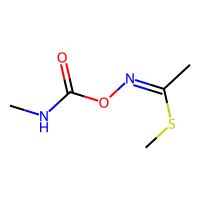
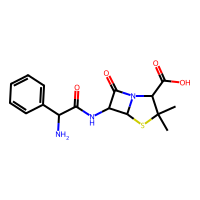
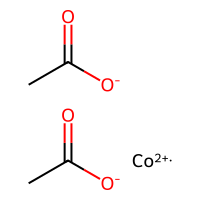
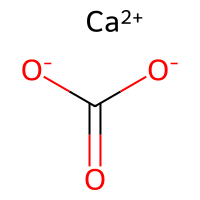
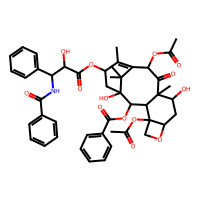
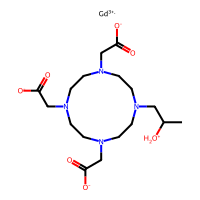
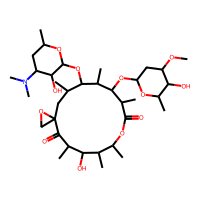
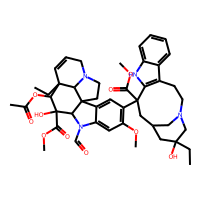
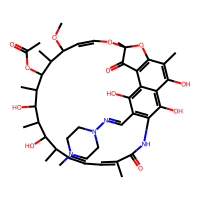
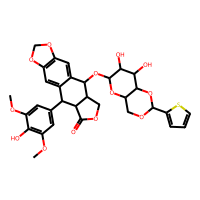

In [3]:
PandasTools.AddMoleculeColumnToFrame(df, "canonicalsmiles")
df

## データの1つを2次元で可視化

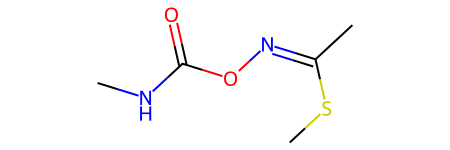

In [4]:
df["ROMol"][0]

## データの1つを3次元で可視化

In [5]:
# 3次元で可視化
IPythonConsole.drawMol3D(df["ROMol"][0])

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## 簡易的な構造最適化を行い3次元で可視化

In [6]:
# 水素を付加する
molH = Chem.AddHs(df["ROMol"][0])

# ETKDGによる簡易的な構造最適化を行う
p = AllChem.ETKDG()
AllChem.EmbedMolecule(molH, p)

# 3次元で可視化
IPythonConsole.drawMol3D(molH)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.